# Outline
- ### Kullback - Leibler divergence
    - ### Example
- ### Cross - entropy
    - ### Example
- ### The relation between cross - entropy, KL divergnce and entropy
    - ### Proof
    - ### Example
- ### Applications in machine learning
    - ### Example
- ### Resources


# Kullback – Leibler divergence  
The **Kullback - Leibler divergence** or **relative entropy** ($D_{KL}(P\space || \space Q)$) is a measure in information theory that describes the distance between two probability distributions.  
  
The term divergence refers to a concept in statistical mathematics. It is a function that takes two probability distributions as input ($p$, $q$). There are some rules for divergence:  
  
Let $p$ and $q$ be two probability distributions. Then:  
  
$D(p, q) \ge 0$  
  
$D(p, p) = 0$  
  
As you can see, a divergence isn't necessarily symmetrical ($D(p,\space q) \ne D(q,\space p)$). Neither the KL divergence is. That's why we say $D_{KL}(P\space || \space Q)$ is the KL divergence of $Q$ with respect to $P$.  
  
The KL divergence is the expectation of the logarithmic difference between the probabilities $P$ and $Q$, where the expectation is taken using the probabilities of $P$:  
  
$D_{KL}(P\space || \space Q) = E_{x \sim p}[log_b(P(x)) - log_b(Q(x))] = E_{x \sim p}[log_b(\frac{P(x)}{Q(x)})]$  
  
For discrete distributions it can be rewritten in the following formula:  
  
$D_{KL}(P\space || \space Q) = \sum_{x \in X}P(x)log_b(\frac{P(x)}{Q(x)})$  
  
Where $P(x)$ and $Q(x)$ is the probability mass function of the random variables.  
  
And for continuous distributions, the KL divergence is calculated using this integral:  
  
$D_{KL}(P\space || \space Q) = \int_{x \in X}p(x)log_b(\frac{p(x)}{q(x)})dx$  
  
Where $p(x)$ and $q(x)$ is the probability density function of the random variables.  
  
The higher the relative entropy of $Q$ with respect to $P$, the more distinguish the distributions. Let's see this in an example.  
  
## Example
Let $B \sim Bin(250, 0.008)$ and $P \sim Pois(2)$.

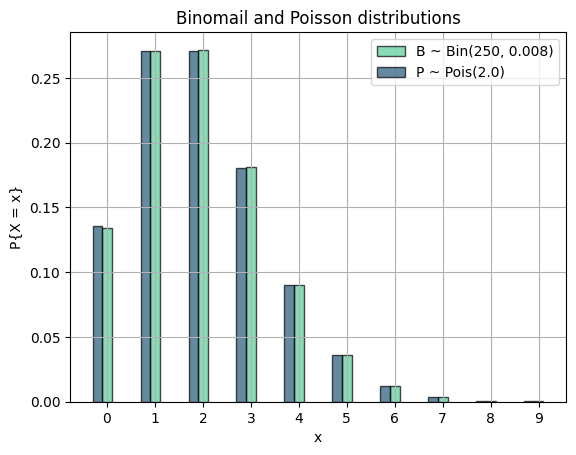

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt 
from scipy.stats import poisson, binom

green = '#57cc99'
blue = '#22577a'
red = '#e56b6f'

line_thickness = 3

n = 250
p = 0.008
mu = n * p

width = 0.2

x_values = np.arange(0, 10)

binomial_pmf = binom.pmf(x_values, n, p)
poisson_pmf = poisson.pmf(x_values, mu)

fig, ax = plt.subplots()

ax.bar(x_values, binomial_pmf, width, label='B ~ Bin({}, {})'.format(n, p), color=green, alpha=0.7, edgecolor='black')
ax.bar(x_values - width, poisson_pmf, width, label='P ~ Pois({})'.format(mu), color=blue, alpha=0.7, edgecolor='black')

ax.set_xticks(x_values)
ax.set_xlabel('x')
ax.set_ylabel('P{X = x}')
ax.set_title("Binomail and Poisson distributions")
ax.legend()
plt.grid(True)
plt.show()

Now let's calculate the KL divergence without using the library functions.

In [11]:
def relative_entropy(P, Q):
    res = 0
    for x in range(0, len(P)):
        res += P[x] * math.log(P[x] / Q[x])
    return res

print("D(B || P) =", relative_entropy(binomial_pmf, poisson_pmf))
print("D(P || B) =", relative_entropy(poisson_pmf, binomial_pmf))

D(B || P) = 2.094332797227328e-05
D(P || B) = 1.0766381413449403e-05


Let's recalculate it this time using library functions.

In [12]:
print("D(B || P) =", np.sum(binomial_pmf * np.log(binomial_pmf / poisson_pmf)))
print("D(P || B) =", np.sum(poisson_pmf * np.log(poisson_pmf / binomial_pmf)))

D(B || P) = 2.0943327972273254e-05
D(P || B) = 1.0766381413449322e-05


As you can see, the KL divergence is not symmetrical since $D_{KL}(B\space  \space P) \ne D_{KL}(P\space  \space B)$.

In this example, the KL divergence value is relatively low because $B$ and $P$ random variables have really close distributions. Let's see another example that has higher KL divergence:

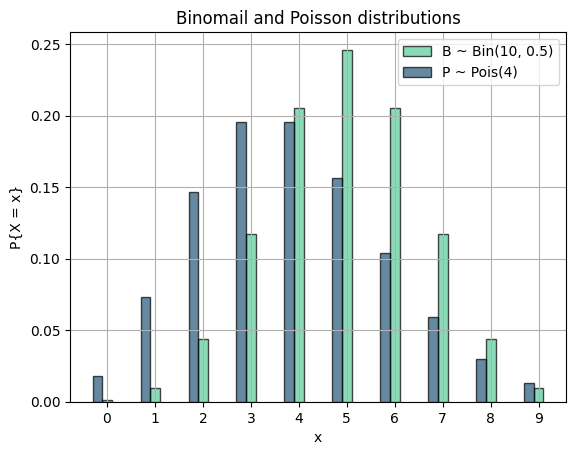

D(B || P) = 0.21867216891725103
D(P || B) = 0.2787591791935817


In [13]:
n = 10
p = 0.5
mu = 4

binomial_pmf = binom.pmf(x_values, n, p)
poisson_pmf = poisson.pmf(x_values, mu)

fig, ax = plt.subplots()

ax.bar(x_values, binomial_pmf, width, label='B ~ Bin({}, {})'.format(n, p), color=green, alpha=0.7, edgecolor='black')
ax.bar(x_values - width, poisson_pmf, width, label='P ~ Pois({})'.format(mu), color=blue, alpha=0.7, edgecolor='black')

ax.set_xticks(x_values)
ax.set_xlabel('x')
ax.set_ylabel('P{X = x}')
ax.set_title("Binomail and Poisson distributions")
ax.legend()
plt.grid(True)
plt.show()

print("D(B || P) =", relative_entropy(binomial_pmf, poisson_pmf))
print("D(P || B) =", relative_entropy(poisson_pmf, binomial_pmf))

As it can be seen, the KL divergence is much higher now, meaning the distributions are distant.
# Cross - entropy
Cross - entropy is another measure in information theory between two probability distributions. The cross-entropy of the distribution $Q$ relative to a distribution $P$ is defined as:

$H(P, Q) = -E_{x \sim p}[log_b(Q(x))]$

For discrete distributions with $P(x)$ and $Q(x)$ as PMFs:

$H(P, Q) = -\sum_{x \in X}P(x)log_{b}(Q(x))$

And for continous distributions with $p(x)$ and $q(x)$ as PDFs:

$H(P, Q) = -\int_{x \in X}p(x)log_{b}(q(x))dx$

Is basically the expectation of logarithm of probability of $Q$ with probabilites of $P$. It measures the difference between two probability distributions, therefore it can be used as loss function. (which we'll discuss later)

## Example

In this example, we're gonna calculate the relative entropy of two probability distributions. First we do it without using the library methods.

In [14]:
import math

def cross_entropy(p, q):
    res = 0
    for x in range(len(p)):
        res -= p[x] * math.log(q[x])
    return res

actual_values = [0, 1, 0]
predicted_values = [0.05, 0.85, 0.10]

print(cross_entropy(actual_values, predicted_values))

0.16251892949777494


Now we use `tensorflow` to calculate the cross entropy loss. 

In [15]:
import tensorflow as tf

loss = tf.keras.losses.CategoricalCrossentropy()
loss = loss(actual_values, predicted_values)
print(loss.numpy)

2024-04-13 04:36:29.132037: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.1625189>>


2024-04-13 04:36:32.683175: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


For another prediction in which our model acts terrible, the loss would be much higher:

In [16]:
actual_values = [0, 1, 0]
predicted_values = [0.85, 0.05, 0.10]

print(cross_entropy(actual_values, predicted_values))

2.995732273553991


# The relation between cross - entropy, KL divergnce and entropy

The cross - entropy, KL divergence and entropy all link up in this famous formula:

$H(P, Q) = H(P) + D_{KL}(P \space || \space Q)$

## Proof
For discrete distributions:

$H(P, Q) = -\sum_{x \in X}P(x)log_{b}(Q(x))$

$H(P) = -\sum_{x \in X}P(x)log_b(P(x))$

$D_{KL}(P\space || \space Q) = \sum_{x \in X}P(x)[log_b(P(x)) - log_b(Q(x))] = \sum_{x \in X}P(x)log_b(P(x)) - \sum_{x \in X}P(x)log_b(Q(x))$  

$H(P) + D_{KL}(P\space || \space Q) = -\sum_{x \in X}P(x)log_b(P(x)) + \sum_{x \in X}P(x)log_b(P(x)) - \sum_{x \in X}P(x)log_b(Q(x)) = - \sum_{x \in X}P(x)log_b(Q(x)) = H(P, Q)$

And for continous distributions:

$H(P, Q) = -\int_{x \in X}p(x)log_{b}(q(x))dx$

$H(P) = -\int_{x \in X}p(x)log_b(p(x))dx$

$D_{KL}(P\space || \space Q) = \int_{x \in X}p(x)[log_b(p(x)) - log_b(q(x))]dx = \int_{x \in X}p(x)log_{b}(p(x))dx - \int_{x \in X}p(x)log_{b}(q(x))dx$

$H(P) + D_{KL}(P\space || \space Q) = -\int_{x \in X}p(x)log_b(p(x))dx + \int_{x \in X}p(x)log_{b}(p(x))dx - \int_{x \in X}p(x)log_{b}(q(x))dx = -\int_{x \in X}p(x)log_{b}(q(x))dx = H(P, Q)$

## Example
Let's see if this equation works in practice as well.

In [17]:
def entropy(p):
    res = 0
    for x in range(len(p)):
        res -= p[x] * math.log(p[x])
    return res

p = np.random.randint(1, 11, size=(20))
q = np.random.randint(1, 11, size=(20))

p = p / np.sum(p)
q = q / np.sum(q)

print("H(P)", entropy(p))
print("H(P, Q)", cross_entropy(p, q))
print("D_KL(P || Q)", relative_entropy(p, q))

print("H(P) + D_KL(P || Q) = ", entropy(p) + relative_entropy(p, q))

H(P) 2.8525747156989896
H(P, Q) 3.184719427881523
D_KL(P || Q) 0.33214471218253266
H(P) + D_KL(P || Q) =  3.184719427881522



# Applications in machine learning

Because cross - entropy and relative entropy are both a way to measure how close two distributions are, they give us the idea of using them as a loss function (in neural networks etc).

Consider a neural network that solves a multi-class classification task. Each sample has a known class label with a probability of $1$, and a probability of $0$ for all other labels. A model can estimate the probability of an example belonging to each class label. Cross-entropy can then be used to calculate the difference between the two probability distributions. We can use the result as a error function and use various algorithms to minimize the loss functions (such as gradient descent). Using the cross-entropy error function instead of the sum-of-squares for a classification problem leads to faster training.

Let's name the known probability distribution of each class label for an example in the dataset $P$, and the probability distribution of each class label that is predicted by our model, $Q$. Our goal is to minimize $H(P, Q)$.

Minimizing the KL divergence and the cross entropy for a classification task are identical. which means Minimizing this KL divergence corresponds exactly to minimizing the cross-entropy between the distributions. Let's see why:

$D_{KL}(P\space || \space Q) = \sum_{x \in X}P(x)log_b(\frac{P(x)}{Q(x)}) = \sum_{x \in X}P(x)log_b(P(x)) - \sum_{x \in X}P(x)log_b(Q(x))$

$\frac{\partial D_{KL}(P \space || \space Q)}{\partial \theta} = \frac{\partial \sum_{x \in X}P(x)log_b(P(x))}{\partial \theta} - \frac{\partial \sum_{x \in X}P(x)log_b(Q(x))}{\partial \theta}$

We know that $P(x)$ is not a function of $\theta$, so the first term would be $0$:

$\frac{\partial D_{KL}(P \space || \space Q)}{\partial \theta} = -\frac{\partial \sum_{x \in X}P(x)log_b(Q(x))}{\partial \theta}$

Which is equal to $\frac{\partial H(P,\space Q)}{\partial \theta}$.

So $\operatorname*{argmin}_\theta D_{KL}(P \space || \space Q) = \operatorname*{argmin}_\theta H(P,\space Q)$.

If our problem is a binary classifaction, the formula would look like this:

$H(P, Q) = -[P(0) \times log(Q(0)) + P(1) \times log(Q(1))]$

## Example 

In this example, I'm gonna use mnist dataset for handwritten digits and train a model for classify handwritten digits. 

**Note**: because the code would take between 10-20 minutes to run, I've already ran the code and got the results. 

Here's the code:

```python
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

num_classes = 10
input_shape = (28, 28, 1)
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
```

The convolutional layers is not our concern here, the important part is that we're using `softmax` as activation functions and cross - entropy loss. Here is the results:

```
(60000, 28, 28) (60000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/10
469/469 [==============================] - 169s 359ms/step - loss: 2.2857 - accuracy: 0.1480 - val_loss: 2.2619 - val_accuracy: 0.3198
Epoch 2/10
469/469 [==============================] - 157s 335ms/step - loss: 2.2484 - accuracy: 0.2405 - val_loss: 2.2167 - val_accuracy: 0.4422
Epoch 3/10
469/469 [==============================] - 155s 331ms/step - loss: 2.2001 - accuracy: 0.3377 - val_loss: 2.1570 - val_accuracy: 0.5635
Epoch 4/10
469/469 [==============================] - 158s 337ms/step - loss: 2.1348 - accuracy: 0.4193 - val_loss: 2.0718 - val_accuracy: 0.6495
Epoch 5/10
469/469 [==============================] - 163s 348ms/step - loss: 2.0396 - accuracy: 0.4967 - val_loss: 1.9481 - val_accuracy: 0.6884
Epoch 6/10
469/469 [==============================] - 155s 331ms/step - loss: 1.9039 - accuracy: 0.5561 - val_loss: 1.7733 - val_accuracy: 0.7254
Epoch 7/10
469/469 [==============================] - 156s 332ms/step - loss: 1.7234 - accuracy: 0.6085 - val_loss: 1.5466 - val_accuracy: 0.7653
Epoch 8/10
469/469 [==============================] - 159s 340ms/step - loss: 1.5103 - accuracy: 0.6462 - val_loss: 1.2962 - val_accuracy: 0.7854
Epoch 9/10
469/469 [==============================] - 163s 348ms/step - loss: 1.3003 - accuracy: 0.6765 - val_loss: 1.0697 - val_accuracy: 0.8022
Epoch 10/10
469/469 [==============================] - 157s 336ms/step - loss: 1.1288 - accuracy: 0.6977 - val_loss: 0.8963 - val_accuracy: 0.8173
The model has successfully trained
Saving the model as mnist.h5
Test loss: 0.8962876200675964
Test accuracy: 0.817300021648407
```

# Resources

- [Deep Learning Project – Handwritten Digit Recognition using Python](https://data-flair.training/blogs/python-deep-learning-project-handwritten-digit-recognition/)
- [A Gentle Introduction to Cross-Entropy for Machine Learning](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)
- [An Introduction to Cross-Entropy Loss Functions](https://encord.com/blog/an-introduction-to-cross-entropy-loss-functions/#h3)
- [Cross - entropy wikipedia page](https://en.wikipedia.org/wiki/Cross-entropy)
- [KL divergence wikipedia page](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)
- [Divergence wikipedia page](https://en.wikipedia.org/wiki/Divergence_(statistics))